# Multicollinearity

## Introduction
**Multicollinearity** occurs when one or more predictor variables in a multiple regression model are highly correlated. This can significantly affect the accuracy of the coefficient estimates within the model.

## Mathematical Explanation

Consider the linear regression model:
$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k + \epsilon $


where:
- $Y$ is the dependent variable
- $X_1, X_2, \ldots, X_k$ are the independent variables
- $\epsilon$ is the error term.

### Normal Equation
The coefficients $\beta$ are estimated using the equation:
$ \beta = (\mathbf{X}´\mathbf{X})^{-1}\mathbf{X}´\mathbf{Y} $

To find $\beta$, the matrix $\mathbf{X}´\mathbf{X}$ must be invertible. However, multicollinearity can make this matrix nearly singular or singular.


### Why $\mathbf{X}´\mathbf{X}$ Becomes Non-invertible
- **Singular Matrix**: If $\mathbf{X}´\mathbf{X}$ is singular, it implies that its determinant is zero due to perfect or high multicollinearity.
- **Linear Dependence**: This happens when one or more independent variables are linear combinations of others.


Matrix Representation

Assume $X_2 = cX_1$, then:
$ \mathbf{X} = \begin{bmatrix} 1 & X_1 & X_2 \\ 1 & X_1 & cX_1 \\ \vdots & \vdots & \vdots \\ 1 & X_1 & cX_1 \end{bmatrix} $


### Covariance Matrix ($\mathbf{X}´\mathbf{X}$)
$ \mathbf{X}´\mathbf{X} = \begin{bmatrix} n & \sum X_1 & c\sum X_1 \\ \sum X_1 & \sum X_1^2 & c\sum X_1^2 \\ c\sum X_1 & c\sum X_1^2 & c^2\sum X_1^2 \end{bmatrix} $


Here, the columns of $\mathbf{X}´\mathbf{X}$ are linear combinations of each other, which results in:
$ \text{det}(\mathbf{X}´\mathbf{X}) = 0 $
indicating that the matrix is not invertible due to multicollinearity.

###Example

**-Economic indicators** Predicting country's economic growth using both consumer spending and consumer income as predictors might lead to multicollinearity because these two are highly correlated; higher income generally leads to higher spending. Including both in the same regression model can cause issues in accurately estimating the impact of each predictor on economic growth.

**-Real Estate Pricing** In real estate, the size of a house and the number of rooms often exhibit multicollinearity. Both these variables tend to increase together; a larger house typically has more rooms. If both variables are used as predictors in a regression model to predict house prices, their high correlation can distort the individual effect of each variable on the pricing, making it difficult to assess which feature (size or number of rooms) truly impacts the house price.






### Testing for invertibility




In [1]:
m=10
n=10
A=zeros(m,n)

for i in 1:(n-1)
    temp = randn(10)
    A[:,i] = temp
end

#The last column is a linear combination of three vectors (from A)
A[:,10] = 3*A[:,1]+ 4*A[:,2]+ A[:,8]
A

#Now we try to invert the matrix
inv(A)

10×10 Matrix{Float64}:
  1.68528e15  -1.81022e15   8.97193e14  …  -1.34774e15   1.53093e14
  2.24704e15  -2.41362e15   1.19626e15     -1.79698e15   2.04124e14
 -0.042723    -0.105125     0.151603       -0.0407291   -0.0508017
 -0.0506371   -0.307717     0.0203694      -0.500605    -0.0904134
 -0.0494373    0.708082    -0.0188507       0.403718     0.339967
  0.101302     0.379092     0.401877    …   0.345642     0.057427
  0.236529    -0.94623      0.0502669      -0.722815    -0.0132634
  5.6176e14   -6.03406e14   2.99064e14     -4.49246e14   5.10309e13
 -0.14499      0.0802497    0.0654772       0.402449     0.0711631
 -5.6176e14    6.03406e14  -2.99064e14      4.49246e14  -5.10309e13

As can be seen, despite having a vector linearly dependent on others it can be inverted, because Julia uses a form of inversion with approximation.

# Analyzing RCT data with Precision Adjustment

In [ ]:
#import Pkg


#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("Iterators")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("DataTables")
#Pkg.add("Latexify")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")
#Pkg.add("StatsModels")
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("TypedTables")
#+-Pkg.add("MacroTools")
#import Pkg; Pkg.add("DataTables")
#import Pkg; Pkg.add("Lasso")
#import Pkg; Pkg.add("Combinatorics")
#import Pkg; Pkg.add("StatsBase")
#import Pkg; Pkg.add("TypedTables")
#import Pkg; Pkg.add("MacroTools")
#import Pkg; Pkg.add("NamedArrays")
#import Pkg; Pkg.add("PrettyTables")
#import Pkg; Pkg.add("TexTables")
import Pkg
Pkg.add("DataFrames")
Pkg.add("CausalInference")
Pkg.add("Graphs")
Pkg.add("Test")
Pkg.add("Statistics")
Pkg.add("CairoMakie")
Pkg.add("GraphMakie")
Pkg.add("StatsModels")
using GLM, StatsModels
using DataTables
using DelimitedFiles
using DataFrames
using Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome

In [ ]:
# Loading data
using DelimitedFiles

mat, head = readdlm("C:/Users/arami/Downloads/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


In [ ]:
#dimenntions of dataframe 

a = size(df,1)
b =  size(df,2)

23

In [ ]:
# Filter control group and just treatment group number 2

penn = filter(row -> row[:tg] in [2,0], df)

first(penn,20)

Row,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Focus on the Treatment group 2

In [ ]:
# Treatment group n°2
replace!(penn.tg, 2 => 1)


rename!(penn, "tg" => "T2")


# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])

describe(penn)

first(penn,10)

Row,abdt,T2,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10635.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10754.0,1.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


 Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

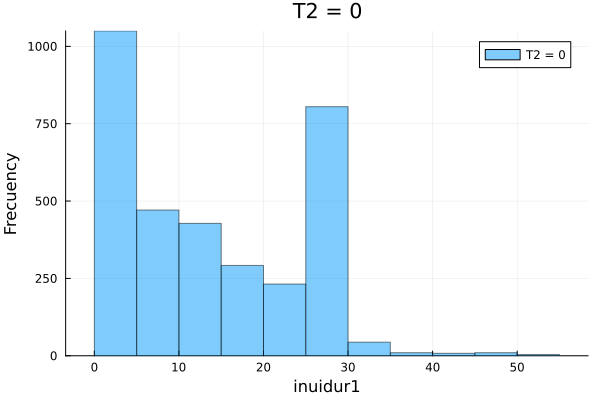

In [ ]:
using DataFrames
using Plots
using StatsPlots

penn_t2_0 = filter(row -> row.T2 == 0, penn)
penn_t2_1 = filter(row -> row.T2 == 1, penn)

# Crear los histogramas
histogram(penn_t2_0.inuidur1, label="T2 = 0", alpha=0.5)

xlabel!("inuidur1")
ylabel!("Frecuency")
title!("T2 = 0")

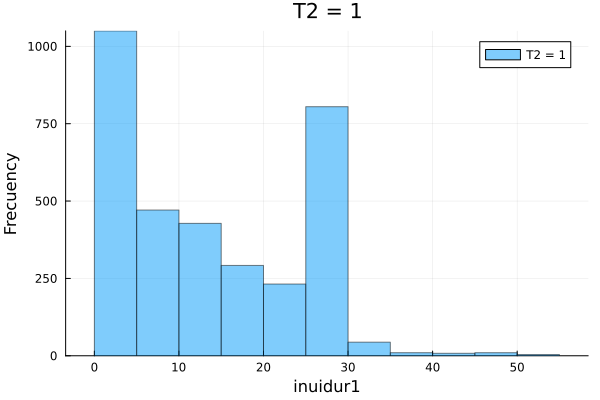

In [ ]:
histogram(penn_t2_0.inuidur1, label="T2 = 1", alpha=0.5)

xlabel!("inuidur1")
ylabel!("Frecuency")
title!("T2 = 1")

Covariate Balance Check

In [ ]:
    # couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [ ]:
reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))

FormulaTerm
Response:
  T2(continuous)
Predictors:
  female(continuous)
  black(continuous)
  othrace(continuous)
  dep(DummyCoding:3→2)
  q2(continuous)
  q3(continuous)
  q4(continuous)
  q5(continuous)
  q6(continuous)
  agelt35(continuous)
  agegt54(continuous)
  durable(continuous)
  female(continuous) & black(continuous)
  female(continuous) & othrace(continuous)
  female(continuous) & dep(DummyCoding:3→2)
  female(continuous) & q2(continuous)
  female(continuous) & q3(continuous)
  female(continuous) & q4(continuous)
  female(continuous) & q5(continuous)
  female(continuous) & q6(continuous)
  female(continuous) & agelt35(continuous)
  female(continuous) & agegt54(continuous)
  female(continuous) & durable(continuous)
  black(continuous) & othrace(continuous)
  black(continuous) & dep(DummyCoding:3→2)
  black(continuous) & q2(continuous)
  black(continuous) & q3(continuous)
  black(continuous) & q4(continuous)
  black(continuous) & q5(continuous)
  black(continuous) & q6(continu

In [ ]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size )

                   | Covariate Balance Check 
                   |           (1)           
---------------------------------------------
       (Intercept) |                0.500*** 
                   |                 (0.137) 
            female |                   0.024 
                   |                 (0.125) 
             black |                  -0.034 
                   |                 (0.084) 
           othrace |                   0.101 
                   |                 (0.289) 
          dep: 1.0 |                   0.141 
                   |                 (0.179) 
          dep: 2.0 |                  -0.189 
                   |                 (0.156) 
                q2 |                  -0.068 
                   |                 (0.140) 
                q3 |                  -0.081 
                   |                 (0.139) 
                q4 |                  -0.054 
                   |                 (0.140) 
                q5 |              

In [ ]:
m1

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

T2 ~ 1 + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + female & black + female & othrace + female & dep + female & q2 + female & q3 + female & q4 + female & q5 + female & q6 + female & agelt35 + female & agegt54 + female & durable + black & othrace + black & dep + black & q2 + black & q3 + black & q4 + black & q5 + black & q6 + black & agelt35 + black & agegt54 + black & durable + othrace & dep + othrace & q2 + othrace & q3 + othrace & q4 + othrace & q5 + othrace & q6 + othrace & agelt35 + othrace & agegt54 + othrace & durable + dep & q2 + dep & q3 + dep & q4 + dep & q5 + dep & q6 + dep & agelt35 + dep & agegt54 + dep & durable + q2 & q3 + q2 & q4 + q2 & q5 + q2 & q6 + q2 & agelt35 + q2 & agegt54 + q2 & durable + q3 & q4 + q3 & q5 + q3 & q6 + q3 & agelt35

### Model specification

Run all specifications:
classical 2-sample approach, no adjustment (CL)
classical linear regression adjustment (CRA)
interactive regression adjustment (IRA)
interactive regression adjustment (IRA) using Lasso. 

In [ ]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)   # 

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |               5,782 
      $R^2$ |               0.001 


In [ ]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.517*** 
                   |   (0.332) 
                T2 |  -0.075** 
                   |   (0.032) 
            female | -0.902*** 
                   |   (0.302) 
             black | -0.448*** 
                   |   (0.140) 
           othrace |    -0.260 
                   |   (1.069) 
          dep: 1.0 |     0.294 
                   |   (0.434) 
          dep: 2.0 |     0.233 
                   |   (0.377) 
                q2 |    -0.115 
                   |   (0.339) 
                q3 |    -0.466 
                   |   (0.338) 
                q4 |    -0.467 
                   |   (0.338) 
                q5 |    -0.380 
                   |   (0.337) 
                q6 |    -0.537 
                   |   (0.356) 
           agelt35 |    -0.303 
                   |   (0.313) 
           agegt54 |    -0.437 
                   |   (0.562) 
        

In [ ]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    

# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 

5782×90 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852   0.883431  …  0.0  -0.073504   0.981148
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852   0.883431     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852   0.883431     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569  …  0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.

In [ ]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   
     

            | Interactive model 
            |        (1)        
--------------------------------
(Intercept) |          2.057*** 
            |           (0.021) 
         T2 |          -0.075** 
            |           (0.032) 
         x1 |            -0.604 
            |           (0.430) 
         x2 |         -0.794*** 
            |           (0.256) 
         x3 |            -1.482 
            |           (2.156) 
         x4 |            -0.005 
            |           (0.664) 
         x5 |             0.227 
            |           (0.475) 
         x6 |            -0.283 
            |           (0.474) 
         x7 |            -0.580 
            |           (0.473) 
         x8 |            -0.538 
            |           (0.474) 
         x9 |            -0.461 
            |           (0.472) 
        x10 |            -0.667 
            |           (0.493) 
        x11 |            -0.618 
            |           (0.418) 
        x12 |            -0.645 
          

In [ ]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T2*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)


5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

In [ ]:
X

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.400726,-0.118817,-0.00518852,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,-0.0652024,-0.540125,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,0.960567,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,-0.129367,-0.024559,-0.0344172,0.0,0.0,-0.117779,-0.0249049,-0.0283639,0.0,-0.141301,-0.0300934,-0.0441024,-0.0347631,-0.00657212,-0.0121065,0.0,-0.073504,-0.0188516,0.168275,0.0498941,0.00217878,0.04895,-0.352454,0.0840284,0.0989167,0.0937602,-0.309387,0.02738,⋯
2,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,0.764441,-0.223279,-0.263231,-0.0652024,0.459875,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,-0.0394327,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,0.870633,-0.024559,-0.0344172,0.0,0.0,-0.117779,-0.0249049,-0.0283639,0.0,-0.141301,-0.0300934,-0.0441024,-0.0347631,-0.00657212,-0.0121065,0.0,-0.073504,-0.0188516,-0.232452,-0.0689229,-0.00300973,-0.0676187,-0.0932014,-0.116075,0.443434,-0.129519,-0.152694,-0.0378223,⋯
3,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279,0.736769,-0.0652024,-0.540125,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,-0.0394327,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,-0.129367,-0.024559,-0.0344172,0.0,0.0,-0.117779,-

In [ ]:
names(X)

180-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x169"
 "x170"
 "x171"
 "x172"
 "x173"
 "x174"
 "x175"
 "x176"
 "x177"
 "x178"
 "x179"
 "x180"

Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables
T2*female
T2*black
T2*agelt35
T2*factor(dep)1

Please comment this figure and give an explanation for the coefficients.

In [ ]:
julia> function coefplot(m)
       n = coefnames(m)[2:end] # no intercept
       vals = coef(m)[2:end]
       errors = stderr(m)[2:end]
       scatter(
           n,
           vals,
           legend = false,
           yerror = 1.96 .* errors,
           title = "Coefficient plot"
       )
       end

julia> df = DataFrame(y = log_inuidur1, x1 = T2, x2 = female);

julia> m = lm(@formula(y ~ x1 + x2), df);

julia> coefplot(m)

This graph shows that the effect of receiving monetary compensation and being over 35 years of age affects the time of unemployment by 1.12 units. Likewise, the effect of receiving monetary compensation and being black affects unemployment time by 0.45 units. Furthermore, the effect of receiving monetary compensation and having at least one dependent affects the unemployment time by 0.76 units. Finally, the effect of receiving monetary compensation and being a woman negatively affects unemployment time by 0.66 units. But the coefficients of the interaction with being black and the number of dependents are not significant because the values of the confidence intervals can be zero

Interactive regression adjustment (IRA) using Lasso

In [ ]:
include("C:/Users/arami/.julia/packages/HDMjl/aG9BB/src/HDMjl.jl")

Main.HDMjl

Treatment group 2 experiences an average decrease of about (7.4574)% in the length of unemployment spell.

In [33]:
using DataFrames, CausalInference, StatsModels
using Graphs
using Test
using Random
using Statistics
using CairoMakie
using GraphMakie
using GLM

In [10]:
#De https://juliadynamics.github.io/CausalityTools.jl/dev/examples/examples_graphs/
function plotgraph(g)
    f, ax, p = graphplot(g,
        nlabels = repr.(1:nv(g)),
        nlabels_color = [:red for i in 1:nv(g)],
    )
    offsets = 0.05 * (p[:node_pos][] .- p[:node_pos][][1])
    offsets[1] = Point2f(0, 0.2)
    p.nlabels_offset[] = offsets
    autolimits!(ax)
    hidedecorations!(ax)
    hidespines!(ax)
    ax.aspect = DataAspect()
    return f
end

plotgraph (generic function with 1 method)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.698987   0.0242438  28.83    <1e-99  0.651412    0.746562
X            0.139133   0.0215663   6.45    <1e-09  0.0968122   0.181453
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t

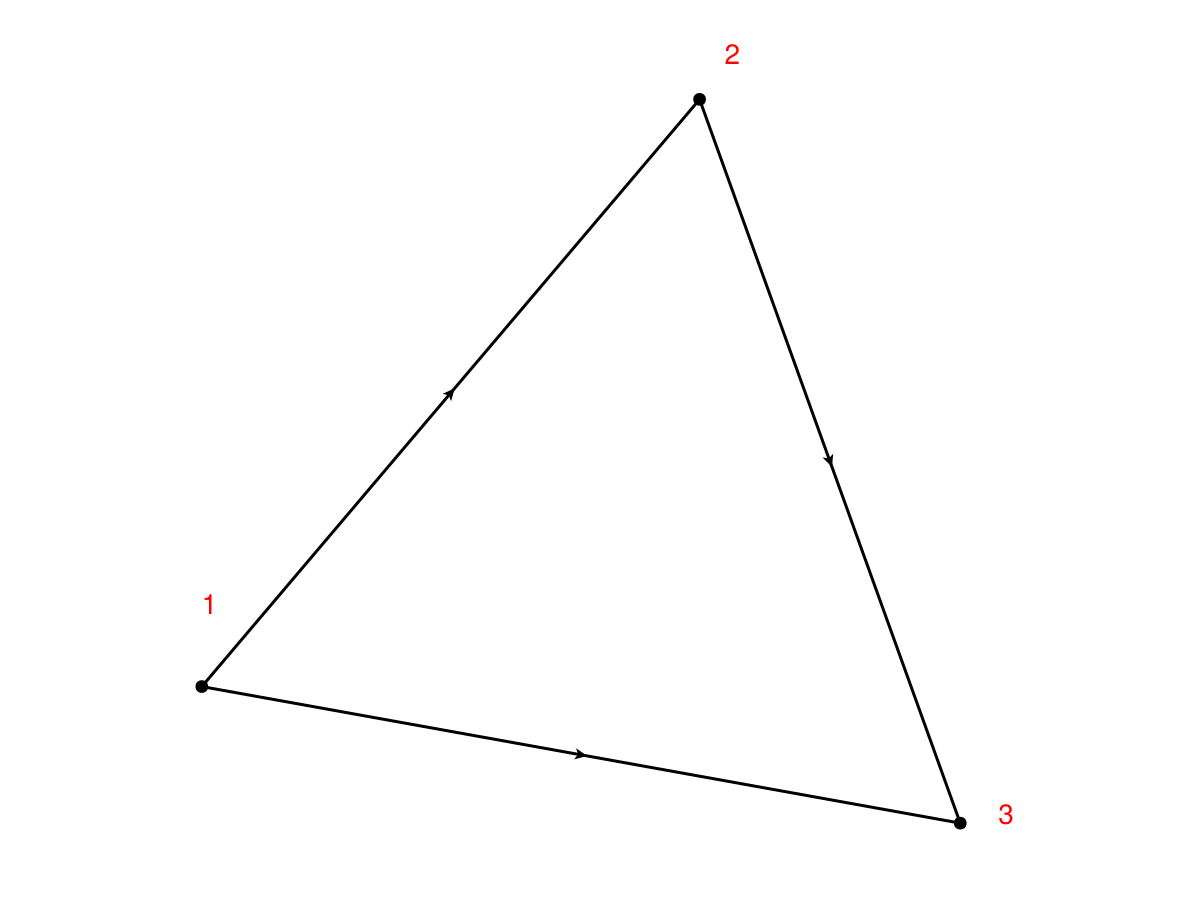

In [50]:
#Setting the Seed
Random.seed!(123)

#Modelo 1
pgd1 = (Z = rand(1000))
pgd2 = (X = rand(1000) + 0.5*pgd2)
pgd3 = (Y = rand(1000) + 0.1*X+0.3*pgd3)


matrix_data_all = [DataFrame(Y = pgd3) DataFrame(X = pgd2) DataFrame(Z =pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([ (1, 3), (1,2), (2, 3)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  4.73106     0.133063  35.55    <1e-99   4.46994    4.99217
X            0.206246    0.16237    1.27    0.2043  -0.112381   0.524872
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

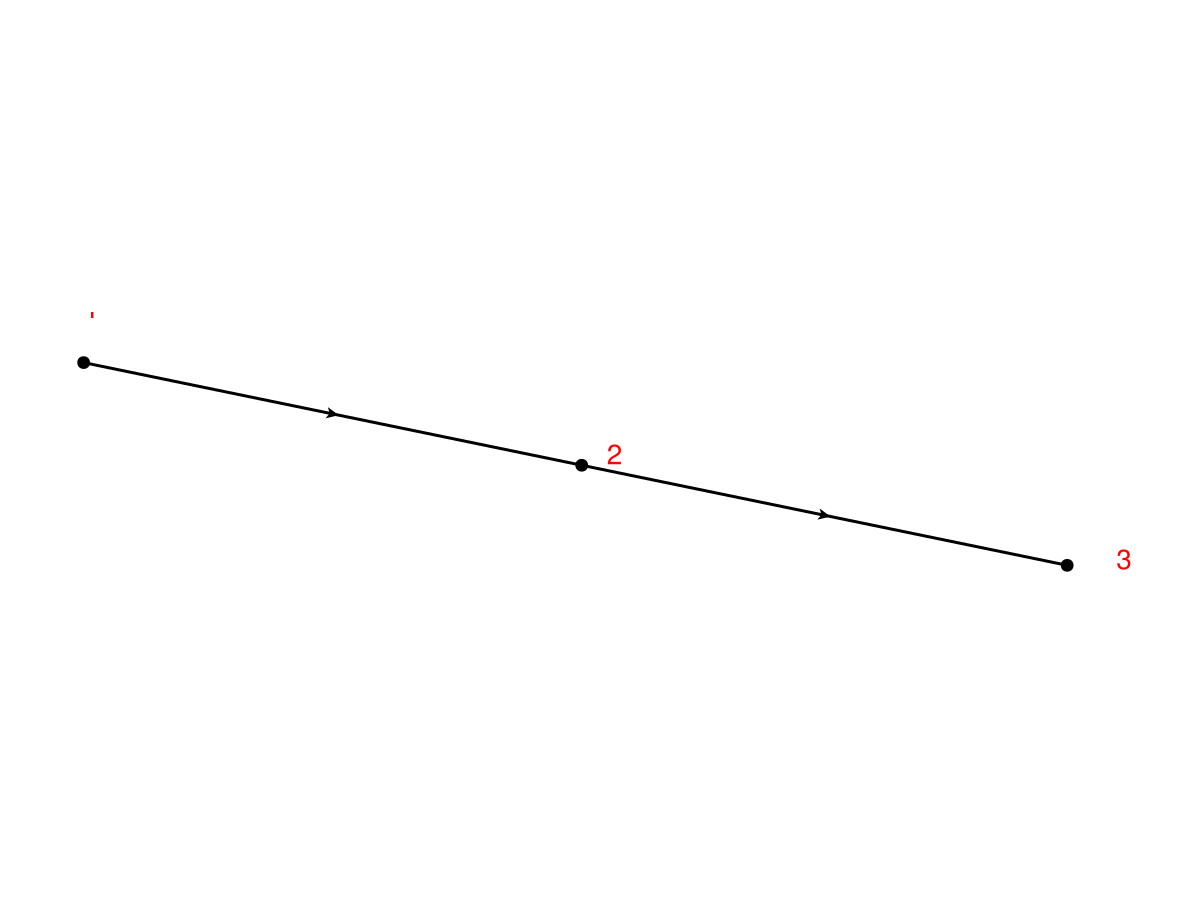

In [52]:
#Modelo 2
pgd1 = (Z = rand(1000))
pgd2 = (X = rand(1000) + 0.5*pgd1)
pgd3 = (Y = rand(1000) + 2*pgd3)


matrix_data_all = [DataFrame(Y = pgd3) DataFrame(X = pgd2) DataFrame(Z =pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([ (1, 2), (2, 3)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.79669   0.0603022  29.79    <1e-99    1.67836    1.91503
X            1.67652   0.0760116  22.06    <1e-87    1.52736    1.82568
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lowe

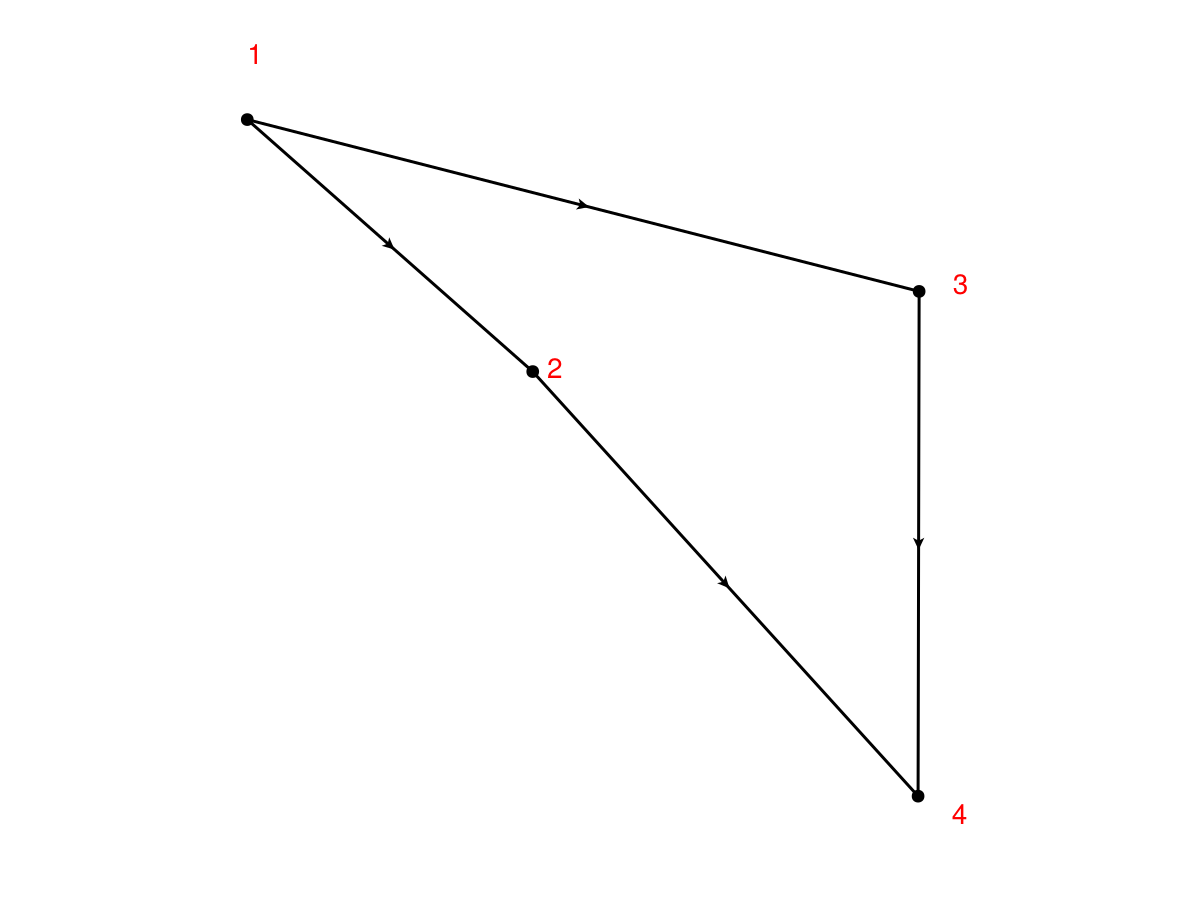

In [63]:
#Modelo 3
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + 0.8*pgd1)
pgd3 = (X = rand(1000) + 0.5*pgd1)
pgd4 = (Y = rand(1000) + 2*pgd2 + pgd3)

matrix_data_all = [DataFrame(Y = pgd4) DataFrame(X = pgd3) DataFrame(Z =pgd2)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(1,3),(2,4),(3,4)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.489167   0.029037   16.85    <1e-55   0.432186   0.546147
X            1.00756    0.0165333  60.94    <1e-99   0.975121   1.04001
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + U

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  P

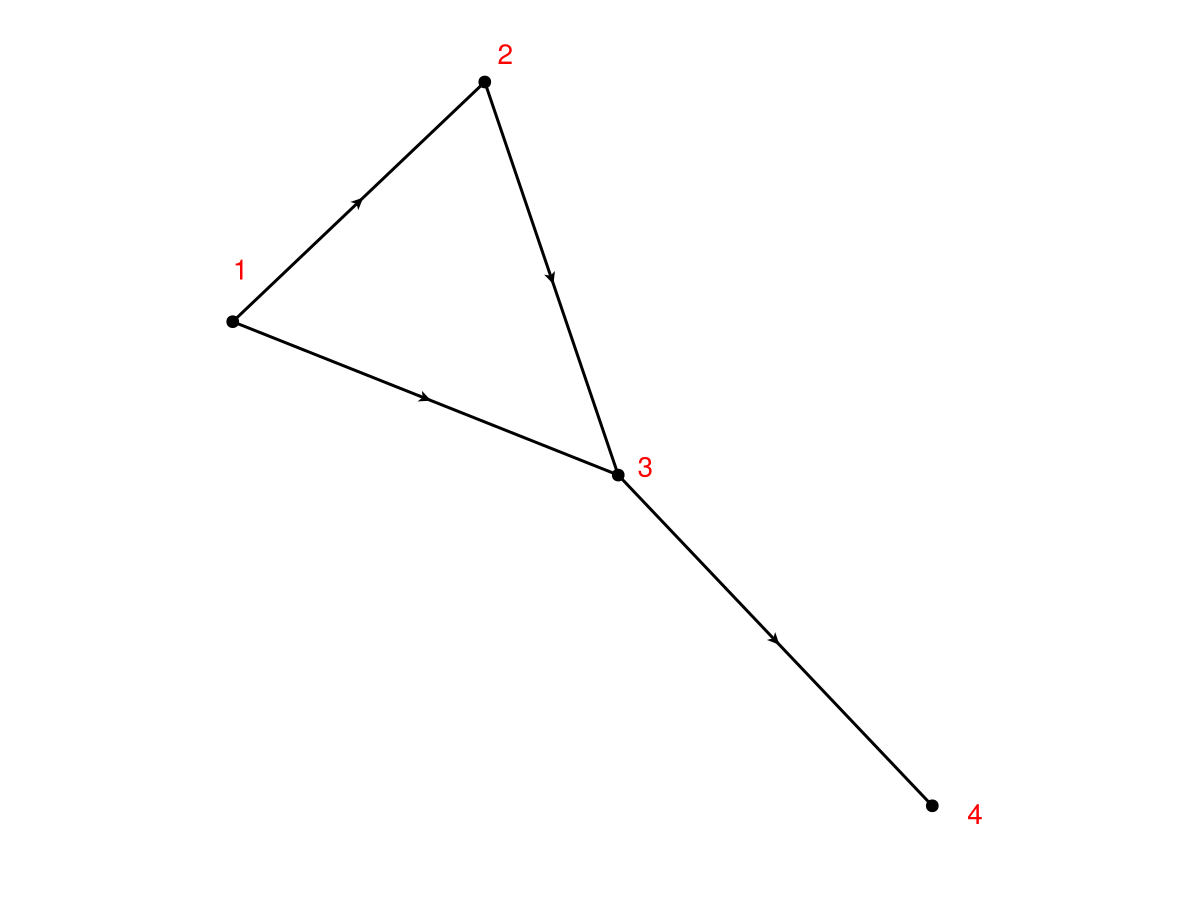

In [66]:
#Modelo 4
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + 0.8*pgd1)
pgd3 = (X = rand(1000) + 0.5*pgd1 + pgd2)
pgd4 = (Y = rand(1000) + pgd3)

matrix_data_all = [DataFrame(Y = pgd4) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X+Z+U), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(2,3),(1,3),(3,4)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  1.17777   0.0678189  17.37    <1e-58    1.04468    1.31085
X            1.80526   0.063079   28.62    <1e-99    1.68147    1.92904
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + M

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t

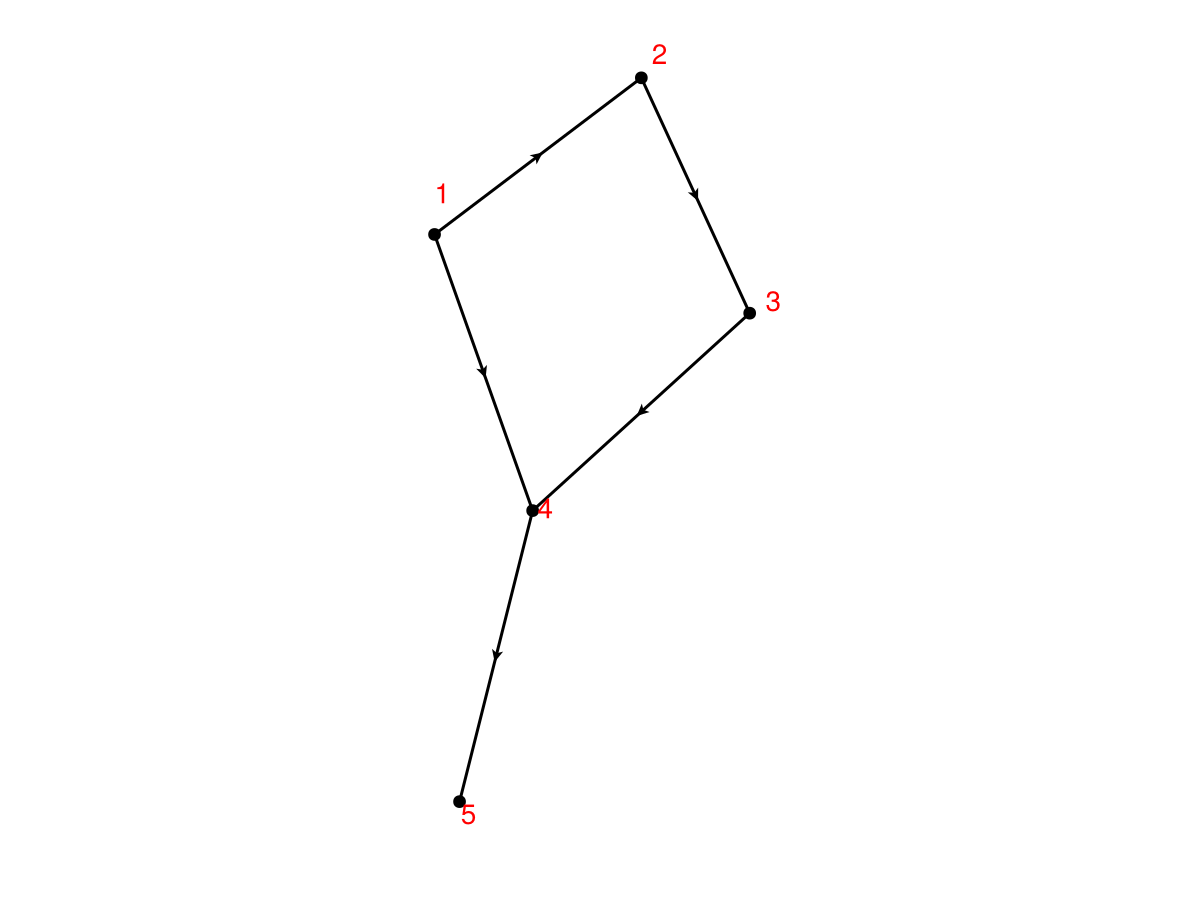

In [76]:
#Modelo 5
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + pgd1)
pgd3 = (X = rand(1000) + 0.5 * pgd2 )
pgd4 = (M = rand(1000) + 5 * pgd1 + pgd3 * 2)
pgd5 = (Y = rand(1000) + 0.5 * pgd4)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z + M), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(2,3),(3,4),(1,4),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  2.22594   0.116576   19.09    <1e-68    1.99717    2.4547
X            2.79109   0.0716302  38.97    <1e-99    2.65053    2.93165
───────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z + M

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

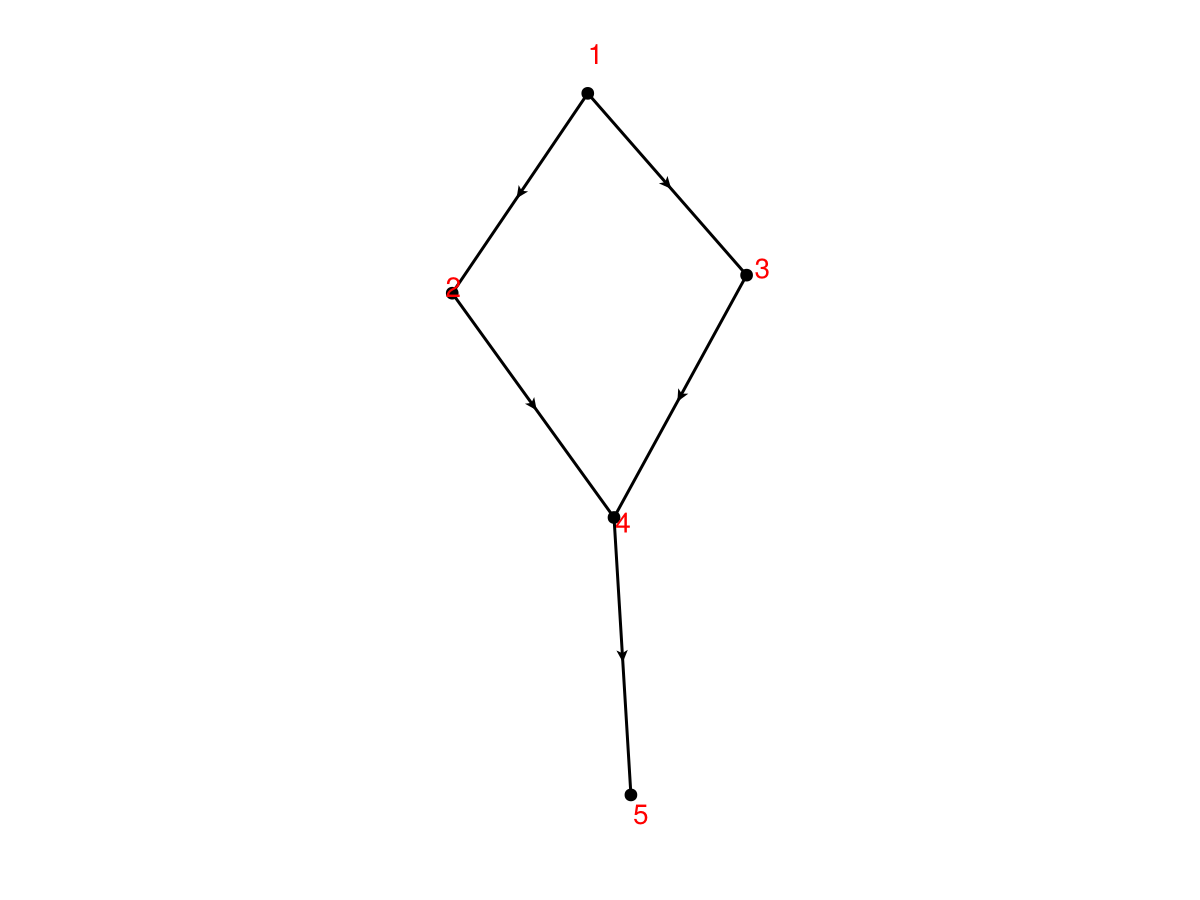

In [77]:
#Modelo 6
pgd1 = (U = rand(1000))
pgd2 = (Z = rand(1000) + pgd1)
pgd3 = (X = rand(1000) + 2 * pgd1 )
pgd4 = (M = rand(1000) + 3 * pgd1 + pgd2 * 4)
pgd5 = (Y = rand(1000) + 1 * pgd4)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z + M), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,2),(1,3),(2,4),(3,4),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  1.02153    0.0576604  17.72    <1e-60   0.90838    1.13468
X            0.792173   0.0363468  21.79    <1e-85   0.720848   0.863497
────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|

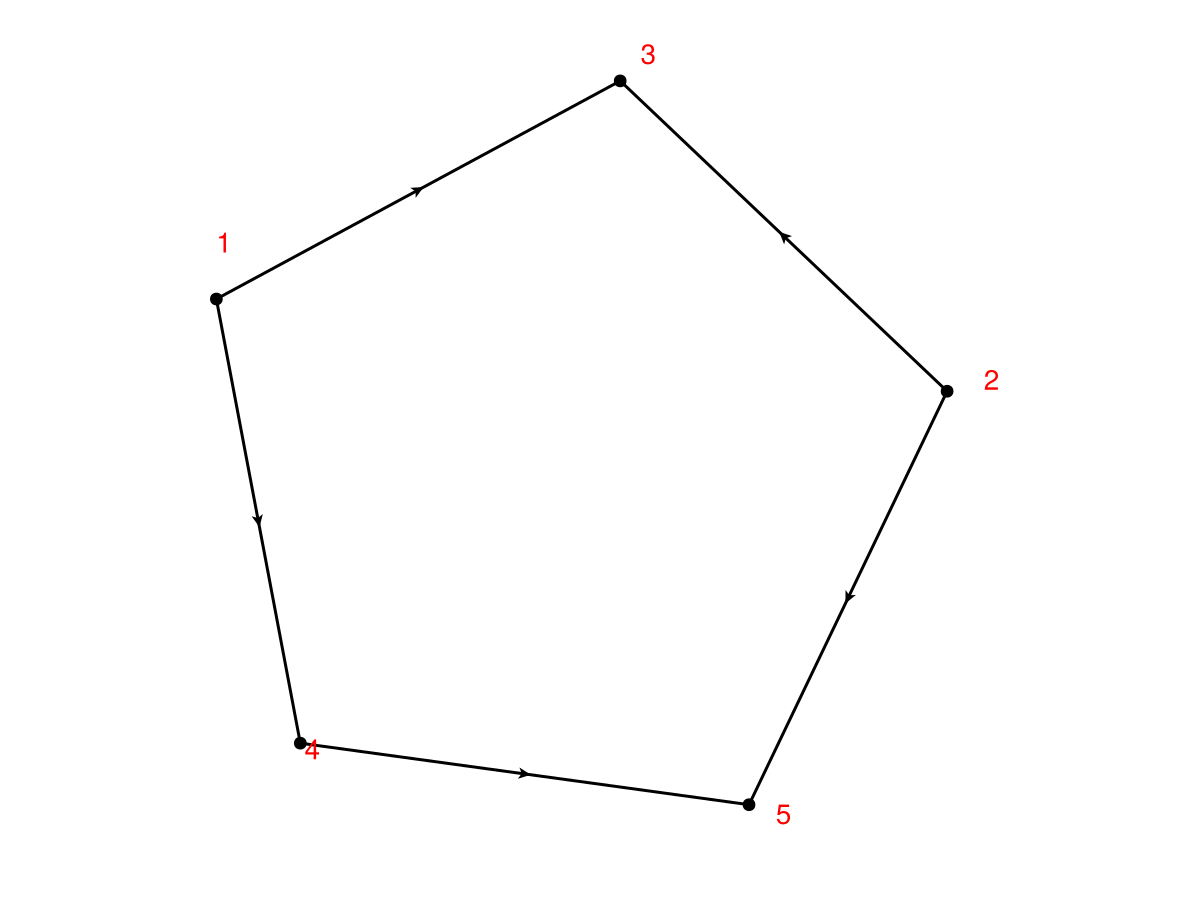

In [81]:
#Modelo 7
pgd1 = (U = rand(1000))
pgd2 = (M = rand(1000))
pgd3 = (Z = rand(1000) + 1 * pgd1 + pgd2)
pgd4 = (X = rand(1000) + 2 * pgd1)
pgd5 = (Y = rand(1000) + pgd4 + 0.5*pgd2)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,4),(1,3),(2,3),(2,5),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)

In [ ]:
#Modelo 8
pgd1 = (U = rand(1000))
pgd2 = (M = rand(1000))
pgd3 = (Z = rand(1000) + 1 * pgd1 + pgd2)
pgd4 = (X = rand(1000) + 2 * pgd1)
pgd5 = (Y = rand(1000) + pgd4 + 0.5*pgd2)

matrix_data_all = [DataFrame(Y = pgd5) DataFrame(X = pgd3) DataFrame(Z =pgd2) DataFrame(M = pgd4) DataFrame(U = pgd1)]
ols_model_no_control = lm(@formula(Y ~ X), matrix_data_all)
ols_model_control = lm(@formula(Y ~ X + Z), matrix_data_all)
println(ols_model_no_control,ols_model_control)

el = Edge.([(1,4),(1,3),(2,3),(2,5),(4,5)])
g = SimpleDiGraph(el)
plotgraph(g)